In [2]:
import pandas as pd
import numpy as np

In [3]:
fifa = pd.read_csv("../Data/fifa22.csv",low_memory=False)

In [829]:
print("Lets look at some of the data to get an understanding of it")
fifa.head(3)

Lets look at some of the data to get an understanding of it


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [15]:
#Change all positions into either G=Gaolskeeper, D=Defence, M=Midfield, A=Attacking
posDict={'GK':'GK', 'LW':"A", 'CAM':'A', 'RW':'A', 'CM':'M', 'RWB':'D', 'CDM':'M', 'LM':'M',
         'CF':'A', 'ST':'A', 'LB':'D', 'CB':'D', 'RB':'D', 'LWB':'D', 'RM':'M'}
#Apply to data
pos=list(fifa['player_positions'])
fifa['position']=fifa['player_positions']
for i in range(len(pos)):
    fifa['position'][i]=posDict[(pos[i].split(', '))[0]] #Take first value
    
fifa=fifa.drop(columns=['player_positions'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sofifa_id,player_url,short_name,long_name,overall,potential,value_eur,wage_eur,age,dob,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,1987-06-24,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,A
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,A
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,1985-02-05,...,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,A
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,1992-02-05,...,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,A
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,M


In [13]:
import sagemaker
import boto3
s3 = boto3.client('s3')

def uploadDataS3(data, bucket, key):
    try:
        s3.upload_file(data, bucket, key)
        print("Upload Successful")
        return True
    except: 
        print("Upload Failed")
    
uploaded = uploadDataS3('../Data/fifa22.csv', 'sagemaker-us-east-1-022761975017', 'autoML/fifa22.csv')

Upload Successful


In [830]:
print("Now let us take a look at the overview of each field")
fifa.describe()

Now let us take a look at the overview of each field


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


### Data Cleansing 
Data cleansing can be an iterative process and can depend on the end goal of the project. We may come back to data cleansing later if we find that our data is still not suitable for the algorithim.
From first glance I think the initial steps we can take are: <br /> 
1. Removing columns that will not help in grouping players into their positions <br />
2. Check the columns we are left with for null values and replace with better data<br />
3. Check remaining columns for outliers and see if they make sense <br />

In [831]:
allCols=fifa.columns.tolist()
print("There are a total of {x} columns in the data\n".format(x=len(allCols)))
print(allCols)

There are a total of 110 columns in the data

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'm

In [832]:
goodCols=allCols.copy()
dropCols=[]
#Lets save the players names for later
names=fifa['short_name']
#Should delete anything that relates to FIFA URLs
for c in goodCols:
    if "_url" in c:
        dropCols.append(c)
        
#Drop colums with name or ID
for c in ["sofifa_id","short_name","long_name"]:
    dropCols.append(c)

#It could be argued by certain teams playing styles that this could impact position but for now I'm going to remove team/nationality
for c in goodCols:
    if("club" in c) or ("nation" in c) or ("league" in c):
        dropCols.append(c)

#Now remove them         
for c in list(set(dropCols)):
    goodCols.remove(c)
print("There are a total of {x} columns left in the data\n".format(x=len(goodCols)))
print(goodCols)

There are a total of 86 columns left in the data

['player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defen

#### Review
So there are still a lot of columns left and some of them are in my opinion going either unhelpful or maybe too directly related to the persons position, for example "cf" is their exact skill as a center forward.<br/> 
Also I'm going to remove overlapping columns like dob because age is a better metric for us and wage because value will suffice.

In [833]:
dropCols=['preferred_foot', 'overall', 'dob','potential','weak_foot','release_clause_eur','body_type','wage_eur','work_rate','player_tags','player_traits','real_face','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for c in dropCols:
    goodCols.remove(c)
print("There are a total of {x} columns left in the data\n".format(x=len(goodCols)))
print(goodCols)

There are a total of 47 columns left in the data

['player_positions', 'value_eur', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']


Down to 50 columns, which is still a lot but we will work with it for now. Now checking on missing data

In [879]:
data=fifa[goodCols]
data.head(3)

,player_positions,value_eur,age,height_cm,weight_kg,skill_moves,pace,shooting,passing,dribbling,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,"RW, ST, CF",78000000.0,34,170,72,4,85.0,92.0,91.0,95.0,...,96,20,35,24,6,11,15,14,8,NaN
1,ST,119500000.0,32,185,81,4,78.0,92.0,79.0,86.0,...,88,35,42,19,15,6,12,8,10,NaN
2,"ST, LW",45000000.0,36,187,83,5,87.0,94.0,80.0,88.0,...,95,24,32,24,7,11,15,14,11,NaN


In [880]:
def distinct(l):
    return(list(set(l)))
pos=list(data['player_positions'])
uList=[]
for i in pos:
    for j in i.split(', '):
        uList.append(j)
    uList=distinct(uList)
    
print(uList)

['GK', 'LW', 'CAM', 'RW', 'CM', 'RWB', 'CDM', 'LM', 'CF', 'ST', 'LB', 'CB', 'RB', 'LWB', 'RM']


In [884]:
from random import choice as rand
#Change all positions into either G=Gaolskeeper, D=Defence, M=Midfield, A=Attacking
posDict={'GK':'GK', 'LW':"A", 'CAM':'A', 'RW':'A', 'CM':'M', 'RWB':'D', 'CDM':'M', 'LM':'M',
         'CF':'A', 'ST':'A', 'LB':'D', 'CB':'D', 'RB':'D', 'LWB':'D', 'RM':'M'}
#Apply to data
data['position']=data['player_positions']
for i in range(len(pos)):
    data['position'][i]=posDict[(pos[i].split(', '))[0]] #Take first value
data.head(3)
data[['player_positions','position']][5:20]

<ipython-input-884-1ff1c653040a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position']=data['player_positions']
<ipython-input-884-1ff1c653040a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position'][i]=posDict[(pos[i].split(', '))[0]] #Take first value


,player_positions,position
5,GK,GK
6,"ST, LW",A
7,GK,GK
8,GK,GK
9,ST,A
10,"CDM, CM",M
11,"CF, ST",A
12,GK,GK
13,"LM, CF, LW",M
14,CDM,M


#### Now lets focus on null values

In [837]:
nulls=data.isnull().sum()/len(data)
nulls=pd.DataFrame(nulls, columns=["percentage"],index=nulls.index)
nulls=nulls.iloc[list(nulls['percentage'] > 0.0)]
nulls

,percentage
value_eur,0.003846
pace,0.110817
shooting,0.110817
passing,0.110817
dribbling,0.110817
defending,0.110817
physic,0.110817
goalkeeping_speed,0.889183


From that simple analysis I think the best corse of action is:
1. Drop values with null value_eur because it is less than .4%. Normally not acceptable but its such a small amount.
2. Null goalkeeping_speed is probably every non-gaolkeeper in the dataset, which is a lot. Since they are not goalkeepers I will give them a value worse than the lowest speed in the dataset 
3. The remaining values it would make sence to give them the median value 

In [838]:
#Drop null values for value_eur
data=data.dropna(subset=['value_eur'])
#find the worst gaolkeeping_speed
gkSpeeds=data['goalkeeping_speed'].iloc[list(data['goalkeeping_speed'].notnull())]
gkSpeeds=gkSpeeds.describe()
print(gkSpeeds)
#Give non-keepers a speed that is 3 standard deviations less than the mean. Also lower than slowest actual keepers value
slowKeeper=gkSpeeds['mean']-3*gkSpeeds['std']
data=data.fillna(value={'goalkeeping_speed':slowKeeper})
#Finally fill the remaining columns that contain nulls with the median values in that column 
medianCols=list(nulls.index)
medianCols.remove('goalkeeping_speed')
medianCols.remove('value_eur')
data=data.fillna(value=data[medianCols].median())

count    2124.000000
mean       36.439266
std        10.750788
min        15.000000
25%        27.000000
50%        36.000000
75%        45.000000
max        65.000000
Name: goalkeeping_speed, dtype: float64


In [839]:
nulls=data.isnull().sum()/len(data)
nulls=pd.DataFrame(nulls, columns=["percentage"],index=nulls.index)
nulls=nulls.iloc[list(nulls['percentage'] > 0.0)]
nulls

,percentage


### As we can see above we have remove all null values from the data. Now lets have a look at outliers

In [840]:
def minMaxScaler(col):
    return((col -col.min())/(col.max()-col.min()))

#Lets drop the field of interest since it will not be used for the K-means algo
positions=data['player_positions']
normData=data.copy()
normData=normData.drop(columns=['player_positions'])
#Make sure there are no non numeric columns 
print("Unique datatypes are {x}".format(x=set(list(data.dtypes))))
for col in normData.columns:
    normData[col]=minMaxScaler(data[col])
normData.head(3)

Unique datatypes are {dtype('O'), dtype('float64'), dtype('int64')}


,value_eur,age,height_cm,weight_kg,skill_moves,pace,shooting,passing,dribbling,defending,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0.402034,0.666667,0.294118,0.377049,0.75,0.826087,0.973684,0.970588,1.000000,0.25974,...,1.000000,0.179775,0.340909,0.218391,0.044944,0.100000,0.142857,0.133333,0.068182,0.0
1,0.615962,0.592593,0.588235,0.524590,0.75,0.724638,0.973684,0.794118,0.867647,0.38961,...,0.904762,0.348315,0.420455,0.160920,0.146067,0.044444,0.109890,0.066667,0.090909,0.0
2,0.231923,0.740741,0.627451,0.557377,1.00,0.855072,1.000000,0.808824,0.897059,0.25974,...,0.988095,0.224719,0.306818,0.218391,0.056180,0.100000,0.142857,0.133333,0.102273,0.0


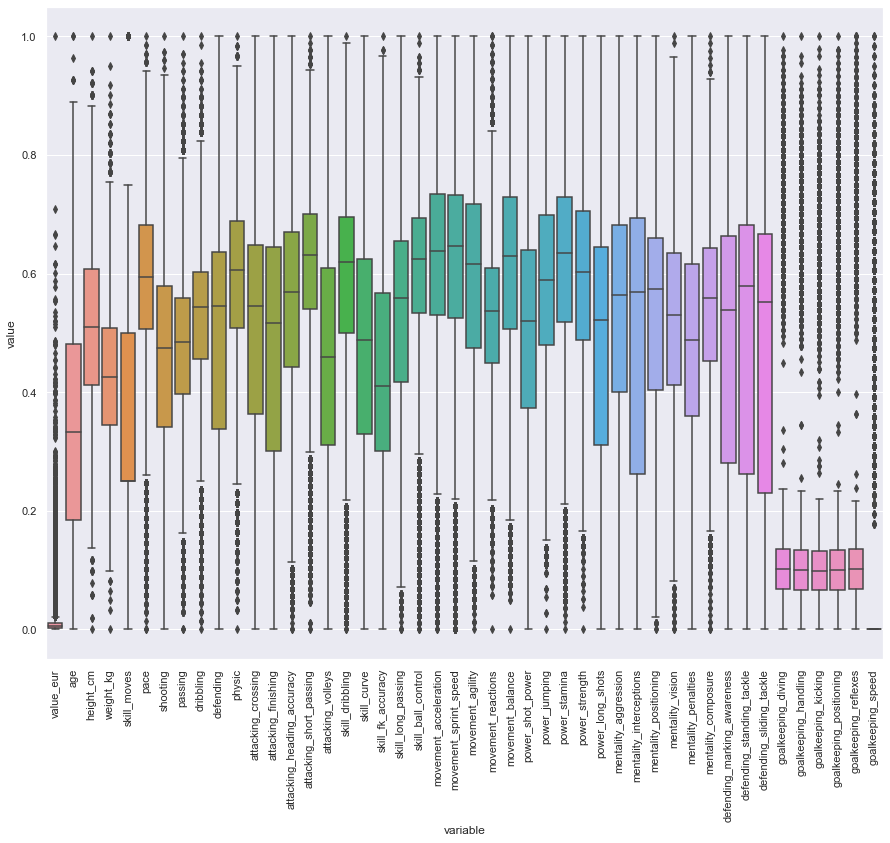

In [841]:
import matplotlib.pyplot as plt
import seaborn
from seaborn import boxplot
melted=pd.melt(normData)
seaborn.set(rc={"figure.figsize":(15, 12)}) 
plt=boxplot(x='variable',y='value',data=melted)
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt

##### Outliers Approach
I'm going to take a fairly easy approach here from eyeballing the above graph. <br/>
The first column highlights a column that is highly skewed. This probably represents a bigger problem in football altogehter where the majority of players are paid a similar amount but then start players or specific teams in top leagues where players are getting paid vastly more. These players should not be ignored from our data but because of how skewed the data is I'm going to drop this column. <br/>
Then the same could be said for all goalkeeping stats. Most palyers are not goalkeeprs so the majority of the values are low, and all actual goalkeepers are going to look like outliers. Since this is actually a perfect way of identifying gaolkeepers these columns and all rows will be kept. <br/>
From the greaph the majority of the rest of the data is relatively centered or within the whiskers of the box plot and as I don't want to ditch highly skilled or terrible players I'm going to keep all of these values. 

## Now lets run the K-Means algorithm!

In [842]:
normData=normData.drop(columns=['value_eur'])

In [843]:
#Import necessary packages
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [844]:
kmeans = KMeans(
        init="random",
        n_clusters=4, #GK,DF,MD,FW
        n_init=20,
        max_iter=900,
        random_state=12)
kmeans.fit(normData)

KMeans(init='random', max_iter=900, n_clusters=4, n_init=20, random_state=12)

In [845]:
print("The lowest SSE value: {x}".format(x=kmeans.inertia_))
print("Final locations of the centroids\n {x}".format(x=kmeans.cluster_centers_))
print("The number of iterations required to converge: {x}".format(x=kmeans.n_iter_))

The lowest SSE value: 10706.761772366355
Final locations of the centroids
 [[ 4.03847035e-01  4.72279104e-01  3.99604286e-01  4.42525181e-01
   6.01558118e-01  5.42428921e-01  6.03920876e-01  6.15440787e-01
   6.24902752e-01  6.55007691e-01  6.54349869e-01  5.79569702e-01
   5.98334913e-01  7.23719515e-01  5.64284742e-01  6.94493957e-01
   6.32608556e-01  5.72937896e-01  6.81354606e-01  7.00627721e-01
   6.73133957e-01  6.60775626e-01  6.83510723e-01  6.13976454e-01
   6.89248417e-01  6.23785121e-01  6.22819270e-01  7.35804497e-01
   6.15672335e-01  6.31792032e-01  6.70835629e-01  6.80529004e-01
   6.46960406e-01  6.49426733e-01  5.62705220e-01  6.51703145e-01
   6.45752714e-01  6.70115183e-01  6.42028871e-01  9.52028289e-02
   9.49775186e-02  9.38037047e-02  9.41312756e-02  9.62545583e-02
   1.15879528e-15]
 [ 2.99272948e-01  4.71053135e-01  3.90396003e-01  4.35407950e-01
   6.48252582e-01  5.68812853e-01  4.61550886e-01  5.65891890e-01
   2.34361698e-01  4.90485744e-01  5.39424052e-0

In [846]:
for i in range(10):
    print("Player: {name} is in position {pos} and K-Means group {k}".format(name=names.loc[i],pos=positions.loc[i],k=kmeans.labels_[i]))

Player: L. Messi is in position A and K-Means group 0
Player: R. Lewandowski is in position A and K-Means group 0
Player: Cristiano Ronaldo is in position A and K-Means group 0
Player: Neymar Jr is in position A and K-Means group 0
Player: K. De Bruyne is in position M and K-Means group 0
Player: J. Oblak is in position GK and K-Means group 2
Player: K. Mbappé is in position A and K-Means group 0
Player: M. Neuer is in position GK and K-Means group 2
Player: M. ter Stegen is in position GK and K-Means group 2
Player: H. Kane is in position A and K-Means group 0


#### First results could be promising! 
From the above we see that the top 10 ranked players were all labelled as 2 or 3. Apart from Kevin De Bruyne who is a midfielder these labels are correct, and maybe it could be argued that Kevin is an attacking midfielder so that is why he was labelled as such. <br/>
Let's try again on the 5 players of each position and see if it is actually working as hoped. 

In [847]:
topPlayers={"GK":[],"D":[],"M":[],"A":[]}   

In [848]:
posDf=pd.DataFrame(list(positions),columns=["positions"],index=range(len(positions)))
for d in topPlayers:
    inds=posDf.loc[posDf['positions']==d].index
    topPlayers[d]=inds[:5]
for d in topPlayers:
    print("Top 5 {pos} players are:".format(pos=d))
    for i in topPlayers[d]:
        print("Player: {name} is in position {pos} and K-Means group {k}".format(name=names.loc[i],pos=positions.loc[i],k=kmeans.labels_[i]))
    print("\n")

Top 5 GK players are:
Player: J. Oblak is in position GK and K-Means group 2
Player: M. Neuer is in position GK and K-Means group 2
Player: M. ter Stegen is in position GK and K-Means group 2
Player: T. Courtois is in position GK and K-Means group 2
Player: Ederson is in position GK and K-Means group 2


Top 5 D players are:
Player: V. van Dijk is in position D and K-Means group 0
Player: Sergio Ramos is in position D and K-Means group 0
Player: Marquinhos is in position D and K-Means group 0
Player: A. Robertson is in position D and K-Means group 0
Player: T. Alexander-Arnold is in position D and K-Means group 0


Top 5 M players are:
Player: K. De Bruyne is in position M and K-Means group 0
Player: N. Kanté is in position M and K-Means group 0
Player: H. Son is in position M and K-Means group 0
Player: Casemiro is in position M and K-Means group 0
Player: J. Kimmich is in position M and K-Means group 0


Top 5 A players are:
Player: L. Messi is in position A and K-Means group 0
Playe

### Damn :(
##### Not what we wanted to see at all
It looks like the algo can correctly identify a goalkeeper but has grouped all other players together. Now, what I image has happened is that the remaining outfield players have been split between Good, Mediocor and Bad. So lets see some players from groups 1 and 4 and see if this is correct. 

In [849]:
labels=pd.DataFrame(kmeans.labels_,columns=['lab'])
l=[]
for i in range(10):
    j=rand(list(labels.loc[labels['lab'].isin([0,1])].index))
    print("Player: {n} is in group {g}. Attributes are:\n".format(n=names[j],g=labels['lab'].loc[j]))
    print(data.loc[j])

Player: M. Prévot is in group 1. Attributes are:

player_positions                    GK
value_eur                      1.7e+06
age                                 24
height_cm                          187
weight_kg                           81
skill_moves                          1
pace                                69
shooting                            54
passing                             58
dribbling                           64
defending                           56
physic                              66
attacking_crossing                  13
attacking_finishing                  7
attacking_heading_accuracy          11
attacking_short_passing             15
attacking_volleys                    6
skill_dribbling                      6
skill_curve                         14
skill_fk_accuracy                   12
skill_long_passing                  22
skill_ball_control                  14
movement_acceleration               43
movement_sprint_speed               26
movement_agili

Having a look at those random players it does look like they are on the lower end of the skill spectrume. Lets confirm this by looking at there positions in the overall rating chart

In [850]:
data["labels"]=labels
labels['ind']=range(len(labels))
labels.groupby(by='lab').mean()

,ind
lab,
0,5990.748850
1,10494.719631
2,10641.523070
3,11848.723649


In [851]:
print(data[['age','labels']].groupby(by='labels').count())
data.groupby(by='labels').mean().transpose().round(3)

         age
labels      
0.0     5615
1.0     5719
2.0     2122
3.0     5635


labels,0.0,1.0,2.0,3.0
value_eur,5339087.266,2004065.221,2630089.538,1348756.877
age,26.888,24.628,24.937,24.231
height_cm,181.460,181.230,181.331,181.214
weight_kg,75.603,74.749,74.828,74.557
skill_moves,2.560,2.305,2.274,2.228
pace,69.279,68.164,67.452,67.935
shooting,56.602,51.557,51.269,50.045
passing,61.640,56.378,55.948,54.859
dribbling,66.444,61.873,61.507,60.501
defending,55.460,51.232,51.279,50.321


In [852]:
print(data[['age','player_positions']].groupby(by='player_positions').count())
data.groupby(by='player_positions').mean().transpose().round(3)

                   age
player_positions      
A                 4810
D                 6366
GK                2124
M                 5865


player_positions,A,D,GK,M
value_eur,3480677.755,2527228.244,1930764.595,3017488.491
age,24.769,25.421,26.185,24.925
height_cm,180.069,182.499,188.517,178.362
weight_kg,73.966,75.933,81.678,72.189
skill_moves,2.786,2.202,1.000,2.649
pace,71.467,65.705,69.000,68.332
shooting,63.546,40.118,54.000,56.379
passing,57.483,52.790,58.000,62.039
dribbling,66.356,56.697,64.000,65.801
defending,33.953,63.795,56.000,53.100


In [853]:
for i in range(10):
    j=rand(list(labels.loc[labels['lab']==3].index))
    print("Player: {n} is in group {g}. Actual position is: {p}".format(n=names[j],g=labels['lab'].loc[j],p=positions[j]))

Player: Waldo is in group 3. Actual position is: M
Player: K. Corbally is in group 3. Actual position is: M
Player: G. Yow is in group 3. Actual position is: M
Player: R. Bacchia is in group 3. Actual position is: GK
Player: M. Winciersz is in group 3. Actual position is: M
Player: T. Gomulka is in group 3. Actual position is: M
Player: A. Al Hafith is in group 3. Actual position is: D
Player: J. Svensson is in group 3. Actual position is: D
Player: B. Camp is in group 3. Actual position is: D
Player: G. Sánchez is in group 3. Actual position is: GK


### New approach. Let's run PCA on the data and see what results we get
This approach will also let us graph the results and see if we can get any useful groupings

In [854]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [871]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(normData)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf['position']=data['player_positions']
principalDf['label']=labels['lab']
print("Total variance explained by PCA is: {tot}\nBreakdown:{each}".format(tot=sum(pca3.explained_variance_ratio_),each=pca3.explained_variance_ratio_))
principalDf[5:10]

Total variance explained by PCA is: 0.777186062067057
Breakdown:[0.49960091 0.18894684 0.08863831]


,principal component 1,principal component 2,principal component 3,position,label
5,2.072987,-0.278236,1.038495,GK,2
6,-1.536913,-1.086572,0.542837,A,0
7,1.868800,-0.342966,1.294136,GK,2
8,1.988735,-0.263438,1.179205,GK,2
9,-1.414423,-0.621209,0.989518,A,0


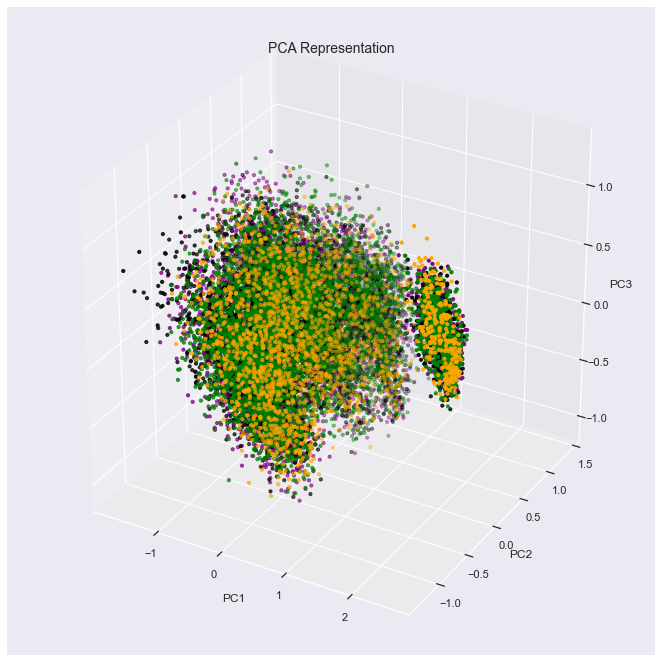

In [873]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
posColourDict={'GK':'Orange','D':'Green','M':'Purple','A':'Black'}
for pos in posColourDict:
    df=principalDf.loc[principalDf['position']==pos]
    axes.scatter(df['principal component 1'],df['principal component 2'],df['principal component 3'],c=posColourDict[pos], cmap = 'prism', s=10)

In [877]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(normData)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['position']=data['player_positions']
principalDf['label']=labels['lab']
print("Total variance explained by PCA is: {tot}\nBreakdown:{each}".format(tot=sum(pca2.explained_variance_ratio_),each=pca2.explained_variance_ratio_))

Total variance explained by PCA is: 0.6885477480120703
Breakdown:[0.49960091 0.18894684]


<module 'matplotlib.pyplot' from 'C:\\Users\\cwright\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

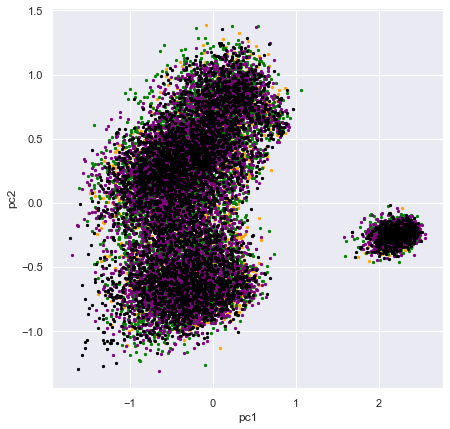

In [875]:
plt.figure(figsize=(7,7))
for pos in posColourDict:
    col=posColourDict[pos]
    df=principalDf.loc[principalDf['position']==pos]
    plt.scatter(df['principal component 1'],df['principal component 2'],c=col,cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\cwright\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

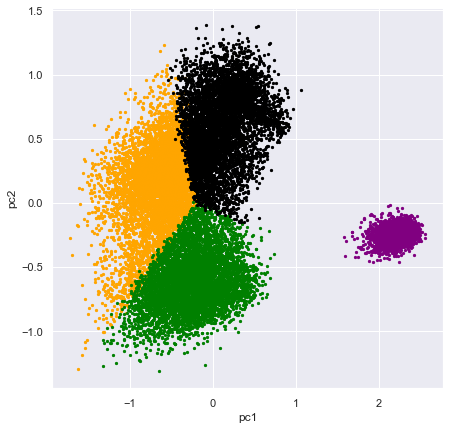

In [878]:
plt.figure(figsize=(7,7))

for lab in [0,1,2,3]:
    col=posColourDict[list(posColourDict)[lab]]
    df=principalDf.loc[principalDf['label']==lab]
    plt.scatter(df['principal component 1'],df['principal component 2'],c=col,cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt

In [866]:
list(posColourDict)

['GK', 'D', 'M', 'A']